## Import the libraries to use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data preprocessing:
- Upload and read data files
- Check the properties of data

In [2]:
data_df = pd.read_csv('data_housing_california.csv')
data_df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,36,49,7.0,28,2,4.625,162500,INLAND
1,4,2,2.0,6,2,2.375,137500,INLAND
2,1,6,2.0,8,2,1.625,55000,INLAND
3,26,15,3.0,11,3,5.048,350000,NEAR OCEAN
4,26,18,3.0,5,3,0.536,275000,INLAND


In [3]:
data_df['median_house_value'].dtype

dtype('int64')

In [4]:
data_df['median_house_value'].isna().sum()

0

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19648 entries, 0 to 19647
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  19648 non-null  int64  
 1   total_rooms         19648 non-null  int64  
 2   total_bedrooms      19448 non-null  float64
 3   population          19648 non-null  int64  
 4   households          19648 non-null  int64  
 5   median_income       19648 non-null  float64
 6   median_house_value  19648 non-null  int64  
 7   ocean_proximity     19648 non-null  object 
dtypes: float64(2), int64(5), object(1)
memory usage: 1.2+ MB


## We will remove the ocean_proximity column because it only has text information that the linear regression model cannot use

In [6]:
data_df = data_df.drop('ocean_proximity', axis=1)

## View attribution data visually using Seaborn charts. The data has not been processed at this time

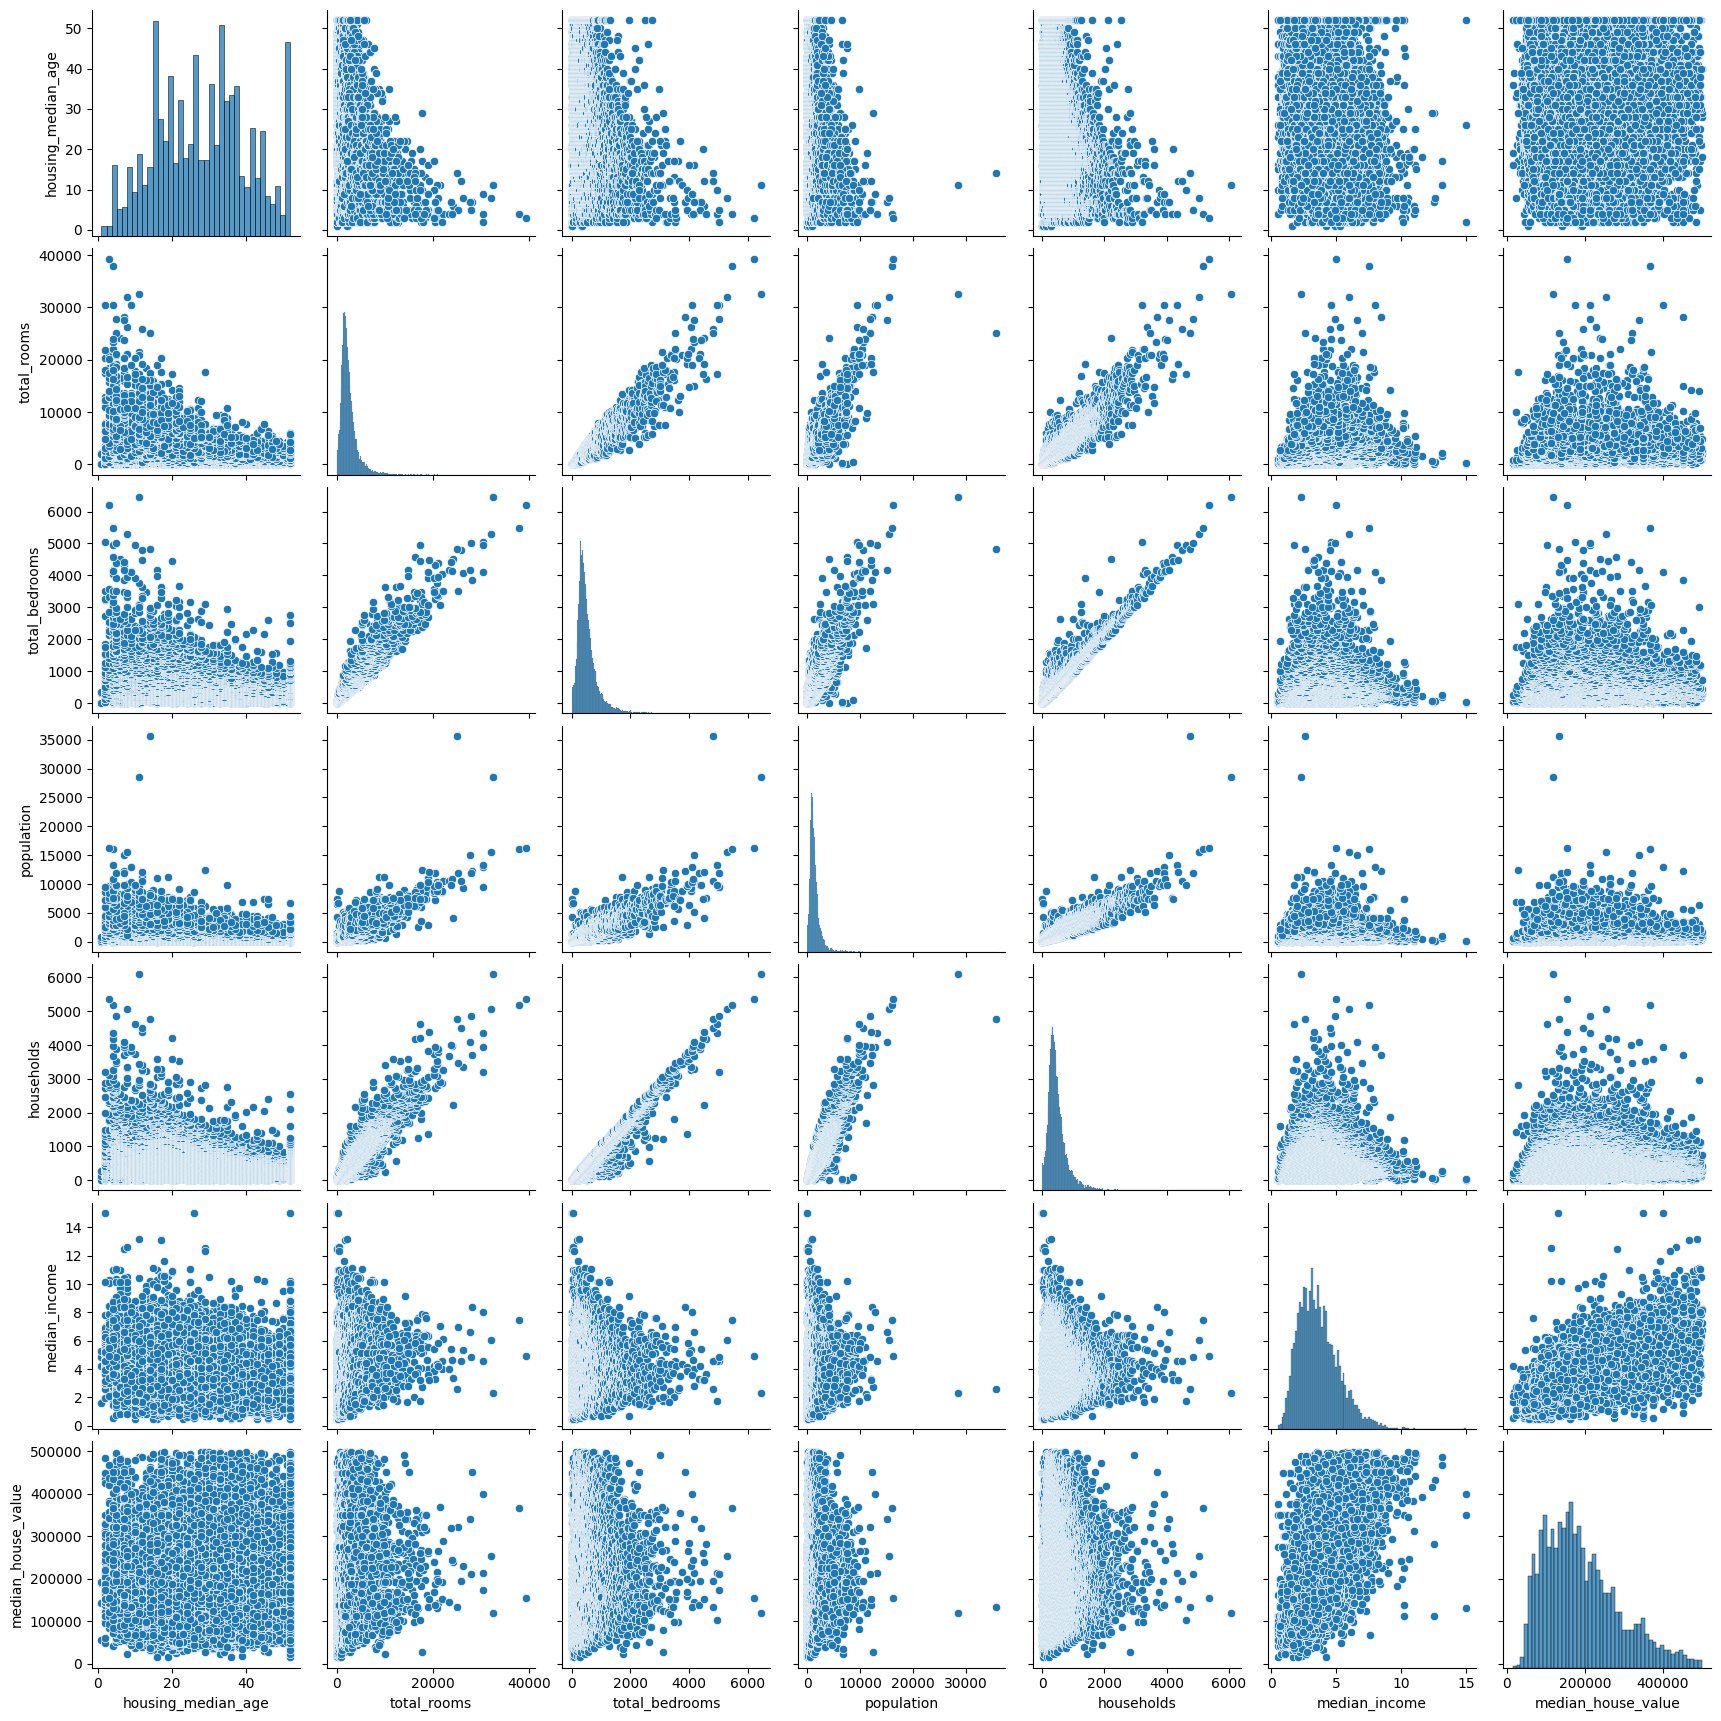

In [7]:
sns.pairplot(data_df)

## Distribution chart of the average value of each apartment in each apartment complex
    We see that the average value of apartments is often concentrated
    at a price of 50,000 to 500,000 USD, and at most 100,000 to 300,000 USD

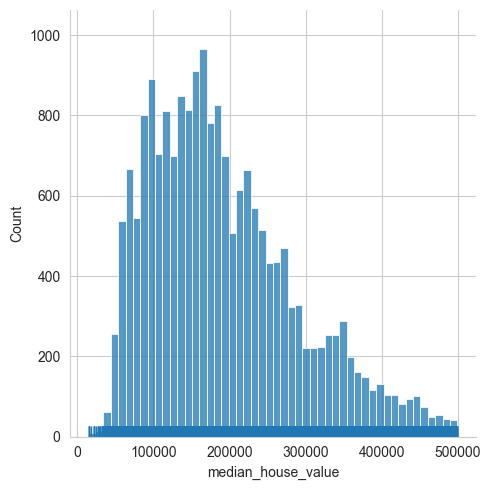

In [8]:
sns.set_style("whitegrid")
sns.displot(data_df['median_house_value'], kde = False, rug = "True")
plt.show()

## Check the correlation in the heat map

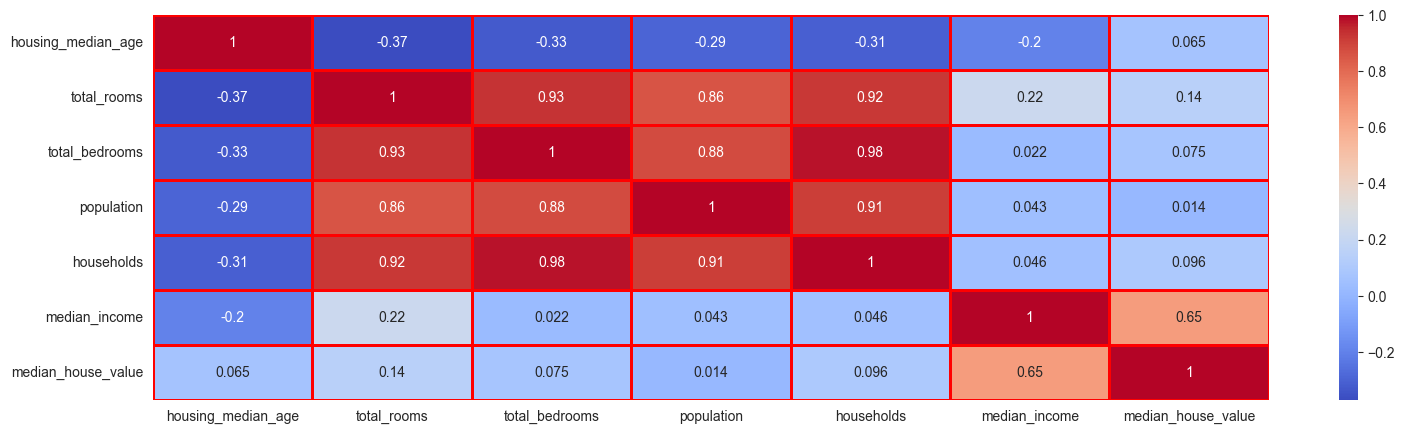

In [9]:
plt.figure(figsize=(18,5))
sns.heatmap(data_df.corr(), annot=True, lw = 1, linecolor="r",cmap="coolwarm")
plt.show()

## Data Preprocessing Steps:

#### 1. Data Splitting:
Now, let's perform the preprocessing step of splitting the datasets.
To begin training a regression model, we first need to split our data into an array X containing the features to be trained (independent variables) and an array y with the target variable (dependent variable), in this case, the median_housing_price column.

In [10]:
y = data_df["median_house_value"]
X = data_df.drop("median_house_value", axis = 1)

#### 2. Separate the training set and test set in the ratio 60:40
#### Using the Scikit – Learn model_selection library, we import train_test_split, this method helps us create data used to train and test the model.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=1, shuffle=True)

In [13]:
X_train.shape

(11788, 6)

In [14]:
y_train.shape

(11788,)

In [15]:
X_test.shape

(7860, 6)

In [16]:
y_test.shape

(7860,)

In [17]:
X_train.head().index

Index([15314, 8456, 17010, 11664, 11034], dtype='int64')

## Check what data is currently in each input column? Are there any columns that have inconsistent data types? If not suitable, how to proceed?

In [18]:
X_train.dtypes

housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
dtype: object

Each input column already has the appropriate data type

## We will calculate some parameters of the training set
    count: total number 
    mean: average value 
    std: standard deviation 
    min: smallest value 
    max: largest value

In [19]:
pd.set_option("display.float", "{:.3f}".format)
X_train.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,11788.000,11788.000,11674.000,11788.000,11788.000,11788.000
mean,28.253,2638.436,544.024,1450.968,504.816,3.671
std,12.538,2223.908,433.206,1150.728,391.462,1.563
min,1.000,2.000,2.000,3.000,2.000,0.500
25%,18.000,1445.000,299.000,802.000,283.000,2.528
50%,28.000,2120.000,440.000,1188.000,414.000,3.452
75%,37.000,3145.250,653.000,1752.000,609.000,4.575
max,52.000,39320.000,6445.000,28566.000,6082.000,15.000


## Preprocessing the training set data
    - We see that all columns have missing values, we will take the mean value of that column to fill in the missing space
## We will write the transform function to normalize the data

In [20]:
def transform (X_df, y = None):
    out_df = X_df.copy()
    out_df['housing_median_age'].fillna(out_df['housing_median_age'].mean(), inplace=True)
    out_df['total_rooms'].fillna(out_df['total_rooms'].mean(), inplace=True)
    out_df['total_bedrooms'].fillna(out_df['total_bedrooms'].mean(), inplace=True)
    out_df['population'].fillna(out_df['population'].mean(), inplace=True)
    out_df['households'].fillna(out_df['households'].mean(), inplace=True)
    out_df['median_income'].fillna(out_df['median_income'].mean(), inplace=True)
    return out_df

In [21]:
X = transform(X)
X_train = transform(X_train)
X_test = transform(X_test)
X_train

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
15314,22,3634,664.000,1699,640,4.160
8456,29,1170,369.000,1398,373,2.254
17010,6,3883,800.000,2319,787,3.559
11664,46,2062,484.000,1522,469,3.087
11034,27,3230,449.000,1193,448,6.531
...,...,...,...,...,...,...
10955,16,2229,458.000,1199,445,3.482
17289,16,6339,862.000,3132,825,7.107
5192,34,1431,310.000,1162,288,4.369
12172,10,3075,498.000,1368,487,4.667


In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11788 entries, 15314 to 235
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  11788 non-null  int64  
 1   total_rooms         11788 non-null  int64  
 2   total_bedrooms      11788 non-null  float64
 3   population          11788 non-null  int64  
 4   households          11788 non-null  int64  
 5   median_income       11788 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 644.7 KB


In [23]:
data_df = transform(data_df)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [25]:
lm = linear_model.LinearRegression()

## Conduct training data using the fit() method

In [26]:
lm.fit(X_train,y_train)

LinearRegression()

## The returned result is a LinearRegression() function, which proves that the model has finished training

## Prediction and model evaluation:
To predict and test the model, we use the above test data that we have separated.
In which, X_test are the features that the model does not know, y_test are the known results for us to compare with the predicted results from X_test.
To get the prediction results from X_test, we use the predict() method to pass in the X_test argument

In [27]:
predictions = lm.predict(X_test)
print(predictions)

[155421.56084526 168953.8991322   54383.48136985 ... 126952.8578445
 156971.41708358 244600.53341126]


We calculate the coefficient to determine the accuracy of the model. \
The regression model will have the form: lm.intercept_ + lm.coef_*x(n)...

In [28]:
r_sq = lm.score(X_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', lm.intercept_)
print('slope:', lm.coef_)

coefficient of determination: 0.5137722996389216
intercept: -43966.0665447409
slope: [ 1.67614506e+03 -1.90874836e+01  6.59544242e+01 -3.15503185e+01
  1.47219031e+02  4.74025948e+04]


## Use scatter and cufflinks to input 2 initial values ​​and prediction for observation

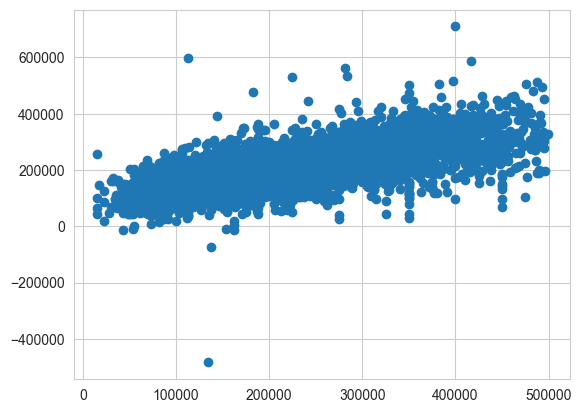

In [29]:
plt.scatter(y_test,predictions)

In [30]:
plt.show()

In [31]:
import cufflinks as cf 
cf.go_offline()
import plotly.io as pio
pio.renderers.default = "colab"
pd.DataFrame({"Giá dự đoán":predictions, "Giá ban đầu": y_test}).iplot(mode="markers")

## To visualize the difference, plot displot() in Seaborn and find out the distribution of this difference

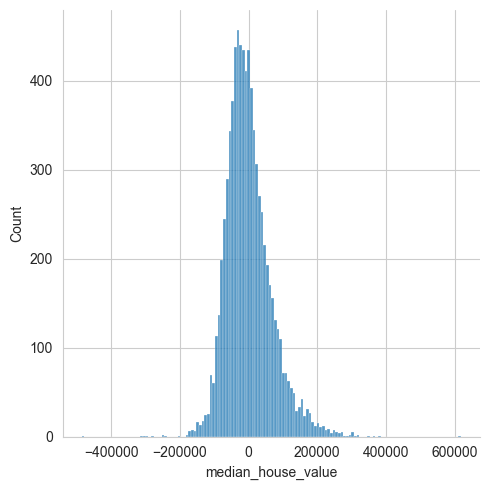

In [32]:
sns.displot(y_test - predictions)

In [33]:
plt.show()

In [34]:
from sklearn import metrics

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2-Score:', metrics.explained_variance_score(y_test, predictions))

MAE: 50146.89855849118
MSE: 4478321486.1930485
RMSE: 66920.26214976334
R2-Score: 0.5271189942674763


## Calculate the relationship of independent variables (X) and dependent variables (y)

In [36]:
print(lm.coef_)

[ 1.67614506e+03 -1.90874836e+01  6.59544242e+01 -3.15503185e+01
  1.47219031e+02  4.74025948e+04]


In [37]:
Z = data_df.drop("median_house_value", axis = 1)
coeff_df = pd.DataFrame(lm.coef_, Z.columns ,columns=['Coefficient'])
coeff_df

,Coefficient
housing_median_age,1676.145
total_rooms,-19.087
total_bedrooms,65.954
population,-31.550
households,147.219
median_income,47402.595


In [38]:
x_new = np.array([33,45,11,34,10,5.2949]).reshape(1,-1)
print(x_new)
y_new = lm.predict(x_new)
print(y_new)

[[33.     45.     11.     34.     10.      5.2949]]
[262604.76091672]


D:\Public\Quan\Machine-learning\venv\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

